# CHAPTER 12: Gradient-Descent Method

### This code runs simulations for Examples 13 and 15 and generates figures 4, 5 and 6 from Chapter 12: Gradient-Descent Method (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions: 

1. generate_logistic
2. logistic_minimizer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer

## Example 12.13 (Comparing constant and vanishing step-sizes)

We return to the logistic algorithm ($12.31$) and simulate its performance under both constant and vanishing step sizes.  Figure$~12.4$ plots a learning curve for the algorithm  using parameters

$$
\rho=2, M=10, N=200,\;\;\mu=0.001 \tag{12.95}
$$

For this simulation, the data $\{\gamma(m),h_m\}$ are generated randomly as follows. First, a random parameter model $w^a\in\mathbb{R}^{10}$ is selected, and a random collection of feature vectors $\{h_m\}$ are generated, say, with zero-mean and unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:
$$
\gamma(m) = \begin{cases}
+1 & \text{if } \left(\dfrac{1}{1+e^{-h_m^{\sf T} w^a}}\right) \geq 0.5 \\
-1 & \text{otherwise}
\end{cases} \tag{12.96}
$$

We will explain in expression ($59.5a$) that construction ($12.96$) amounts to generating data $\{\gamma(m),h_m\}$ that satisfy a logistic probability model. The gradient-descent recursion ($12.30$) is run for $2000$ iterations on the data $\{\gamma(m),h_m\}$. The resulting weight iterate, denoted by $w^{\star}$, is shown in the bottom plot of the figure and the value of the risk function at this weight iterate is found to be

$$
P(w^{\star})\approx 0.6732 \tag{12.97}
$$

The two plots in the top row display the learning curve $P(w_n)$ relative to the minimum value $P(w^{\star})$, both in linear scale (on the left) and in normalized logarithmic scale on the right (according to construction ($12.65$)). The plot on the right in the top row reveals the linear convergence of $P(w_n$) toward $P(w^{\star})$ under constant step sizes, as anticipated by
result ($12.43b$).

fraction of +1 in generated data (desirable to be close to 0.5):
0.505
wait...generating data
wait...processing
limit point and w-star:
[[-0.03092685]
 [ 0.01871619]
 [ 0.01573621]
 [ 0.0028333 ]
 [ 0.03893134]
 [ 0.02693306]
 [ 0.0021095 ]
 [ 0.02559559]
 [ 0.0194255 ]
 [-0.01510374]]
[[-0.0308729 ]
 [ 0.01883358]
 [ 0.01558687]
 [ 0.00280586]
 [ 0.03903493]
 [ 0.02703966]
 [ 0.00188107]
 [ 0.02556608]
 [ 0.01913724]
 [-0.01493763]]
minimum risk value, estimated limit risk value and norm (w-ws)^2:
0.6823305639671309 0.6823310579169817 2.255805925807493e-07
step size:
0.001
number of points:
200
rho:
2
dimension of model:
10
number of gradient-descent iterations:
2000


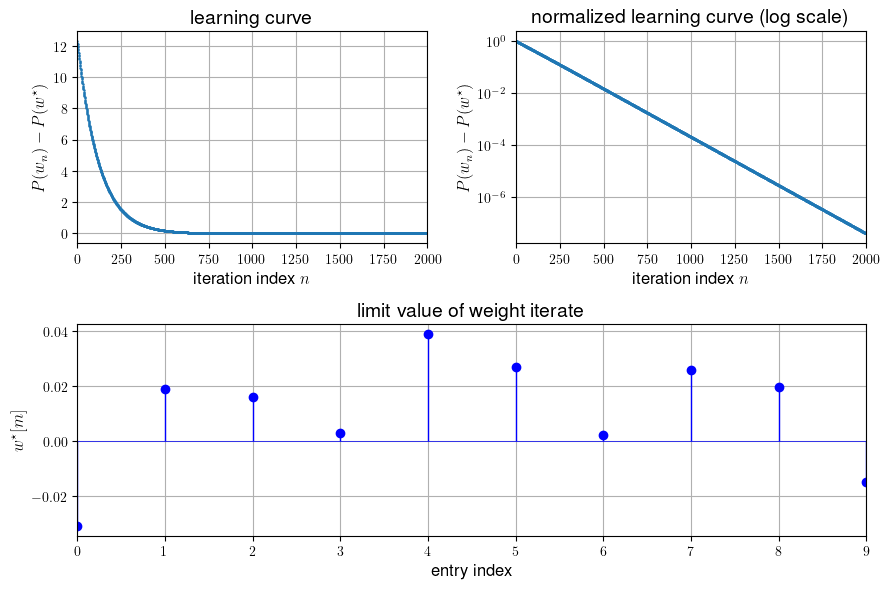

In [3]:
### Constant step-size

# l2-regularized logistic empirical risk
# P(w) = rho\|w\|^2 + (1/N) sum_{n=0}^{N-1} ln(1+exp(-gamma(n)h_n'w))

rho = 2    # regularization parameter
mu = 0.001 # step-size

M = 10    # size of feature vectors
N = 200  # number of data points
L = 2000  # number of gradient-descent iterations

# generating data
zo = np.random.randn(M).reshape(-1,1) # randomly chosen parameter for logistic model
p, gamma_vec, H = generate_logistic(N,zo,0) # generates logistic data
print('fraction of +1 in generated data (desirable to be close to 0.5):') # desirable to be close to 0.5
print(p)
print('wait...generating data')
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H, 0) # minimizer and minimum risk value

w = np.random.randn(M).reshape(-1,1) # initial condition
winit = w.copy()      # save initial condition
P = np.zeros(L).reshape(-1,1) # risk values

print('wait...processing')
for n in range(L):
    
    for m in range(N):
        h_m = H[:, m].reshape(-1,1)  # Feature vector
        gamma_m = gamma_vec[m]  # Label
        a = 1 + np.exp(-gamma_m * np.dot(h_m.T, w))
        P[n] += np.log(a)[0]
    
    P[n] *= 1 / N
    P[n] += rho * np.linalg.norm(w)**2  # risk value 
    
    g = 0
    for m in range(N):
        h_m = H[:,m].reshape(-1,1) # feature vector
        gamma_m = gamma_vec[m] # label
        a = 1 + np.exp(gamma_m * np.dot(h_m.T, w))
        g += gamma_m * h_m * (1 / a)
    
    g *= 1 / N  # Normalize the gradient
    
    w = (1 - 2 * mu * rho) * w + mu * g  # updated w
    
print('limit point and w-star:')
print(w)
print(ws)

print('minimum risk value, estimated limit risk value and norm (w-ws)^2:')
print(Ps[0,0], np.mean(P[L-5:L]), np.linalg.norm(w-ws)**2)

print('step size:')
print(mu)

print('number of points:')
print(N)

print('rho:')
print(rho)

print('dimension of model:')
print(M)

print('number of gradient-descent iterations:')
print(L)  

# figure 4 (Learning curves)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9,6))

plt.subplot(221)
plt.plot(range(L),P-Ps,'.', markersize=1.5) # learning curve
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$$P(w_n)-P(w^{\star})$$', fontsize=12)
plt.title('learning curve', fontsize=14)
plt.xlim([0,2000])
plt.grid()

X=P-Ps
plt.subplot(222)
plt.semilogy(range(L),X/np.max(X),'.', markersize=1.5) # learning curve
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$$P(w_n)-P(w^{\star})$$', fontsize=12)
plt.title('normalized learning curve (log scale)', fontsize=14)
plt.xlim([0,2000])
plt.grid()

plt.subplot(212)
markerline, stemlines, baseline = plt.stem(w, markerfmt='bo', linefmt='b-', basefmt='b') # learning curve
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
plt.xlabel('entry index', fontsize=12)
plt.ylabel('$$w^{\star}[m]$$', fontsize=12)
plt.title('limit value of weight iterate', fontsize=14)
plt.xlim([0,9])
plt.grid()

plt.tight_layout()
plt.show()

**Figure 12.4** *(Top)* Learning curves $P(w_n)$ relative to the minimum risk value $P(w^{\star})$ in linear scale (on the left) and in normalized logarithmic scale (on the right). This latter plot confirms the linear convergence of the risk value toward $P(w^{\star})$. (*Bottom*) Limiting value of the weight iterate $w_n$, which tends to the minimizer $w^{\star}$ according to result $(12.43a)$.

Figure 12.5 repeats the  simulation using the same logistic data $\{\gamma(m),h_m\}$, albeit with a decaying step size sequence of the form:

$$
\mu(n)=\tau/(n+1),\;\;\;\tau=0.1 \tag{12.98}
$$

The gradient-descent recursion ($12.65$) is now repeated for 4000 iterations with $\mu$ replaced by $\mu(n)$, and the resulting learning curve is compared against the curve generated under the constant step size regime  from the previous simulation. The plot on the left shows the learning curves in normalized logarithmic scale; it is clear that the convergence rate under decaying step sizes  is much slower (it starts converging faster but ultimately becomes slower). The plot on the right illustrates this effect; it shows the limiting value $w^{\star}$ that was determined under constant step size learning in Fig.$~12.4$ after 2000 iterations along with the weight iterate that is obtained under the decaying step size after 4000 iterations. It is clear that convergence has not been attained yet in the latter case, and many more iterations would be needed; this is because $\mu(n)$ becomes vanishingly small  as $n$ increases.

wait...processing
limit point and w-star:
[[-0.03636287]
 [ 0.00740166]
 [ 0.02970852]
 [ 0.00589285]
 [ 0.02992082]
 [ 0.01765087]
 [ 0.02395526]
 [ 0.0273945 ]
 [ 0.04832915]
 [-0.03200344]]
[[-0.0308729 ]
 [ 0.01883358]
 [ 0.01558687]
 [ 0.00280586]
 [ 0.03903493]
 [ 0.02703966]
 [ 0.00188107]
 [ 0.02556608]
 [ 0.01913724]
 [-0.01493763]]
minimum risk, estimated limit risk value and norm(w-ws)^2:
0.6823305639671309 0.6869800311409893 0.002175017226753846
step size parameter tau:
0.1
number of points:
200
rho:
2
dimension of model:
10
number of iterations:
4000


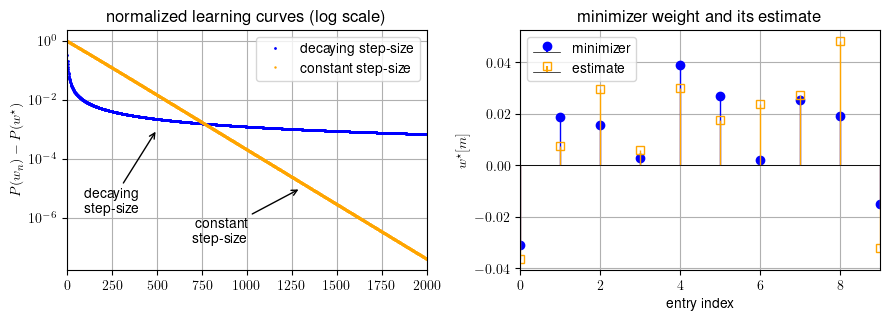

In [4]:
P_constant = P.copy() # saves the risk curve obtained under constant step-size for comparison below

## Decaying step-size

# uses same logistic model as above
# l2-regularized logistic empirical risk
# P(w) = rho\|w\|^2 + (1/N) sum_{n=0}^{N-1} ln(1+exp(-gamma(n)h_n'w))

tau = 0.1   # step-size sequence mu(n) = tau/n          
L2 = 4000 # number of gradient-descent iterations; takes much longer to converge

w = winit.copy() # initial condition
P = np.zeros(L2).reshape(-1,1) # risk function

print('wait...processing')
for n in range(1, L2):
    
    for m in range(N):
        h_m = H[:, m].reshape(-1,1)  # Feature vector
        gamma_m = gamma_vec[m]  # Label
        a = 1 + np.exp(-gamma_m * np.dot(h_m.T, w))
        P[n] += np.log(a)[0]
    
    P[n] *= 1 / N
    P[n] += rho * np.linalg.norm(w)**2  # risk value 
    
    g = 0 #gradient vector for n-th iteratio
    for m in range(N):
        h_m = H[:,m].reshape(-1,1) # feature vector
        gamma_m = gamma_vec[m] # label
        a = 1 + np.exp(gamma_m * np.dot(h_m.T, w))
        g += gamma_m * h_m * (1 / a)
    
    g *= 1 / N  # Normalize the gradient
    
    w = (1 - 2 * tau * rho / n) * w + (tau/n) * g  # updated w  
    
    
print('limit point and w-star:')
print(w)
print(ws)

print('minimum risk, estimated limit risk value and norm(w-ws)^2:')
print(Ps[0,0], np.mean(P[L2-5:L2]), np.linalg.norm(w-ws)**2)

print('step size parameter tau:')
print(tau)
print('number of points:')
print(N)
print('rho:')
print(rho)
print('dimension of model:')
print(M)
print('number of iterations:')
print(L2)

Lx=np.minimum(L,L2)

# figure 5 (Learning curves)
plt.figure(figsize=(9,6))

X=P-Ps
X2=P_constant-Ps
plt.subplot(221)
plt.semilogy(range(Lx), X[:Lx] / max(X), '.', markersize=2, label='decaying step-size', color = 'b')
plt.semilogy(range(Lx), X2[:Lx] / max(X2), '.', markersize=1.5, label='constant step-size', color = 'orange') # learning curve
plt.xlabel(r'iteration index $$n$$')
plt.ylabel('$$P(w_n)-P(w^{\star})$$')
plt.title('normalized learning curves (log scale)')
plt.annotate('decaying \n step-size', xy= (500, 10**(-3)), xytext= (400,10**(-5)), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='top')
plt.annotate('constant \n step-size', xy= (1300, 10**(-5)), xytext= (1000,10**(-6)), 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='top')
plt.xlim([0,2000])
plt.legend()
plt.grid()

plt.subplot(222)
markerline, stemlines, baseline = plt.stem(ws, markerfmt='bo', linefmt='b-', basefmt='k', label='minimizer')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline, stemlines, baseline = plt.stem(w, markerfmt='s', linefmt='orange', basefmt='k', label='estimate')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book
plt.xlabel('entry index')
plt.ylabel('$$w^{\star}[m]$$')
plt.title('minimizer weight and its estimate')
plt.xlim([0,9])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Figure 12.5** (*Left*) Learning curves $P(w_n)$ relative to the minimum risk value $P(w^{\star})$ in normalized logarithmic scale for both cases of constant and decaying step sizes.  (*Right*) After 4000 iterations, the weight iterate $w_n$ in the decaying step size implementation has not converged yet.

## Example 12.15 (Randomized coordinate-descent for regularized least-squares)

Consider the $\ell_2-$regularized least-squares problem ($12.122$). In this case, we can determine the optimal coordinate $w_{n,m}^o$ in closed form at every iteration $n$. Using

$$
\partial P(w)/\partial w_m= 2(\rho+a_m)w_m -2 c_m,\;\;\;m=1,2,\ldots, M \tag{12.139}
$$

we find that the corresponding randomized coordinate-descent implementation is given by 
listing ($12.140$).
 
$$
\begin{array}{l}
\hline
\textbf{Randomized coordinate-descent for solving ($12.122$).}\\\hline\hline
\quad\textnormal{given } N \text{ data points } \{\gamma(\ell),h_{\ell}\}, \ell=0,1,\ldots, N-1;\\
\quad \text{start from an arbitrary initial condition } w_{-1}=0.\\
\quad \textbf{repeat until convergence over } n \geq 0:\\
\quad\;\;\vert \;\; \text{iterate is } w_{n-1}=\text{col}\{w_{n-1,m}\}_{m=1}^M\\
\quad\;\;\vert\;\;\text{select an index } m^o \text{ at random within } 1\leq m\leq M\\
\quad\;\;\vert\;\; a_{m^o} = \frac{1}{N}\sum_{\ell=0}^{N-1}h_{\ell,m^o}^2\\
\quad\;\;\vert\;\;\\
\quad\;\;\vert\;\; c_{m^o} = \frac{1}{N}\sum_{\ell=0}^{N-1}h_{\ell,m^o}\Bigl(\gamma(\ell)-h_{\ell,-m^o}^{\sf T} w_{n-1,-m^o}\Bigr)\\
\quad\;\;\vert\;\; \text{update } w_{n,m^o} = {c_{m^o}}\text{ / }{(\rho+a_{m^o})}\\
\quad\;\;\vert\;\;\\
\quad\;\;\vert\;\; \text{keep } w_{n,m} = w_{n-1,m} \text{ for all } m \neq m^o\\
\quad \textbf{end}\\
\quad w_n = \text{col}\{w_{n,m}\}_{m=1}^M\\
\quad\text{return } w^{\star} \leftarrow w_n.\\\hline
\end{array} \tag{12.140}
$$ 
 
We can describe the algorithm in vector form by introducing the vector and matrix quantities:

$$
\gamma_N = \begin{bmatrix}
\gamma(0)\\
\gamma(1) \\
\vdots \\ 
\gamma(N-1)
\end{bmatrix} \; \text{,} \quad 
H_N = \begin{bmatrix}
h_0^{\sf T}\\
h_1^{\sf T} \\
\vdots \\
h_{N-1}^{\sf T}
\end{bmatrix} \tag{12.141}
$$

where $\gamma_N$ is $N\times 1$ and $H_N$ is $N\times M$. We let $x_{m^o}$ denote the column of index $m^o$ in $H_{N}$ and write $H_{N,-m^o}$ to refer to the data matrix $H_N$ with its $m^o-$th column excluded. That is, $H_{N,-m^o}$ has dimensions $N\times (M-1)$. Then, it  can be verified  that  (see Prob. $12.30$):

$$
w_{n,m^o}\;=\;\frac{1}{\rho+\frac{1}{N}\|x_{m^o}\|^2}\,\times \frac{1}{N}x_{m^o}^{\sf T} \Bigl(\gamma_N - H_{N,-m^o}\, w_{n-1,-m^o}\Bigr) \tag{12.142}
$$
 
We illustrate the operation of the algorithm by generating a random model $w^{o}\in\mathbb{R}^{10}$ with $M=10$, and a collection of $N=200$ random feature vectors $\{h_n\}$. The entries of $w^o$ are selected randomly from a Gaussian distribution with mean zero and unit variance; likewise for the entries of the feature vectors. We also generate noisy target signals:

$$
\gamma(n) = h_n^{\sf T} w^o + v(n) \tag{12.143}
$$

where $v(n)$ are realizations of zero-mean Gaussian noise with variance $\sigma_v^2=0.01$. We set the step size parameter to $\mu=0.01$ and the regularization parameter to $\rho =2/N$. If we differentiate the risk function ($12.122$) relative to $w$, it is straightforward to determine that the minimizer is given by:

$$
w^{\star}= (\rho NI_{M} + H_N^{\sf T} H_N)^{-1} H_N^{\sf T} \gamma_N \tag{12.144}
$$

Substituting $w^{\star}$ into the risk function we find the minimal risk value,  $P(w^{\star})=0.0638$. The learning curves in Fig.$~12.6$ are plotted relative to this value; the curves in the right plot in the first row are normalized by the maximum value of $P(w_n)-P(w^{\star})$ so that they start from the value 1. The learning curves for the coordinate descent implementation are downsampled by a factor $M=10$ since, on average, it takes $10$ iterations for all entries of the weight vector to be updated (whereas, under the  gradient-descent implementation, all entries are updated at every single iteration). The downsampling allows for a fair comparison of the convergence rates of the two methods. It is observed from the results in the figure that both methods are able to estimate $w^{\star}$ and that their learning curves practically coincide with each other.

step size:
0.001
number of points:
200
rho
0.01
dimension of model:
10
number of gradient-descent iterations:
3000
model wo and least-squares w_LS:
[[ 0.50856617]
 [-1.22978511]
 [-0.87124532]
 [ 0.56397043]
 [ 0.07946394]
 [ 0.66744767]
 [-1.1762356 ]
 [-0.04361733]
 [ 0.61082477]
 [-0.51263696]]
[[ 0.50894265]
 [-1.21659142]
 [-0.86219939]
 [ 0.55351654]
 [ 0.08745341]
 [ 0.67096871]
 [-1.17543795]
 [-0.02597055]
 [ 0.60287431]
 [-0.51671998]]
minimum least squares risk value:
0.06198166700792335


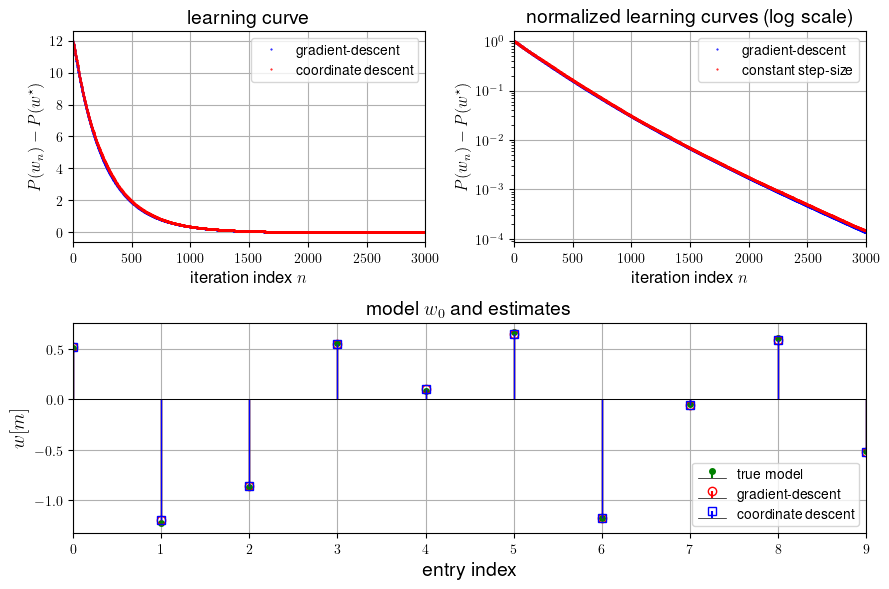

In [5]:
M = 10    # size of feature vectors
N = 200   # number of data points
L = 3000  # number ofiterations

rho = 2/N    # regularization parameter
mu = 0.001 # step-size

var_noise = 0.01

# generating data
wo = np.random.randn(M).reshape(-1,1) # randomly chosen parameter for logistic model
gamma_vec = np.zeros(N).reshape(-1,1)
H = np.random.randn(N,M)
v = np.sqrt(var_noise) * (np.random.randn(N,1).reshape(-1,1))
gamma_vec = np.dot(H, wo) + v # noisy observations

A = 2 * rho * np.eye(M) + (2 / N) * np.dot(H.T, H)
w_LS = np.linalg.inv(A).dot((2 / N) * np.dot(H.T, gamma_vec))
Ps = rho * np.linalg.norm(w_LS)**2 + (1 / N) * np.linalg.norm(gamma_vec - np.dot(H, w_LS))**2 # minimum least-squares


w_batch = np.random.randn(M).reshape(-1,1) # initial condition
w_cd = w_batch.copy() # same initial condition for coordinate descent
P_batch = np.zeros(L).reshape(-1,1) # risk values for batch gradient descent
P_cd = np.zeros(M*L).reshape(-1,1) # coordinate descent

#batch gradient
for n in range(L):
    P_batch[n] = rho * np.linalg.norm(w_batch)**2 + (1/N) * np.linalg.norm(gamma_vec - np.dot(H, w_batch))**2  # risk
    g = (2/N) * np.dot(H.T, (gamma_vec - np.dot(H, w_batch)))
    w_batch = (1 - 2 * mu * rho) * w_batch + mu * g


#randomized coordinate descent
for n in range(M * L):
    P_cd[n] = rho * np.linalg.norm(w_cd)**2 + (1/N) * np.linalg.norm(gamma_vec - np.dot(H, w_cd))**2  # risk
    mo = np.random.randint(0, M)  # random index
    h = H[:, mo]  # corresponding Nx1 column of data
    a = (1/N) * np.linalg.norm(h)**2
    w_aux = np.zeros((M - 1, 1))
    H_aux = np.zeros((N, M - 1))
    
    if mo > 0:
        w_aux[:mo] = w_cd[:mo]
        w_aux[mo:] = w_cd[mo + 1:]
        H_aux[:, :mo] = H[:, :mo]
        H_aux[:, mo:] = H[:, mo + 1:]
    else:
        w_aux = w_cd[1:]
        H_aux = H[:, 1:]
    
    c = (1/N) * np.dot(h.T, (gamma_vec - np.dot(H_aux, w_aux)))
    w_cd[mo] = (1 - 2 * mu * rho) * w_cd[mo] + 2 * mu * (c - a * w_cd[mo])

print('step size:')
print(mu)
print('number of points:')
print(N)
print('rho')
print(rho)
print('dimension of model:')
print(M)
print('number of gradient-descent iterations:')
print(L)
print('model wo and least-squares w_LS:')
print(wo)
print(w_LS)
print('minimum least squares risk value:')
print(Ps)

#figure 6 (Learning curves)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9,6))

plt.subplot(221)
plt.plot(range(L),P_batch-Ps,'.', color = 'b', markersize=1, label = 'gradient-descent') # learning curve
plt.plot(range(L),P_cd[::M] - Ps,'.', color = 'r', markersize=1, label = 'coordinate descent') # learning curve
plt.xlabel('iteration index $n$', fontsize = 12)
plt.ylabel('$$P(w_n)-P(w^{\star})$$', fontsize = 12)
plt.title('learning curve', fontsize = 14)
plt.xlim([0,3000])
plt.legend()
plt.grid()

X_batch = P_batch-Ps
X_cd = P_cd - Ps
X_decimated = X_cd[1:M:M*L]

plt.subplot(222)
plt.semilogy(range(L), X_batch/np.max(X_batch), '.', color = 'b', markersize=1, label='gradient-descent')
plt.semilogy(range(L), X_cd[::M]/np.max(X_cd), '.', color = 'r', markersize=1, label='constant step-size') # learning curve
plt.xlabel('iteration index $n$', fontsize = 12)
plt.ylabel('$$P(w_n)-P(w^{\star})$$', fontsize = 12)
plt.title('normalized learning curves (log scale)', fontsize = 14)
plt.xlim([0,3000])
plt.legend()
plt.grid()

plt.subplot(212)
markerline, stemlines, baseline = plt.stem(wo, markerfmt='go', linefmt='g', basefmt='k', label='true model')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markersize(4) # make the circles smaller to match with the book
markerline, stemlines, baseline = plt.stem(w_batch, markerfmt='ro', linefmt='r', basefmt='k', label='gradient-descent')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markerfacecolor('none') # make the circles hollow to match with the book
markerline, stemlines, baseline = plt.stem(w_cd, markerfmt='bs', linefmt='b', basefmt='k', label='coordinate descent')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5) 
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book
plt.xlabel('entry index', fontsize=14)
plt.ylabel('$w[m]$', fontsize=14)
plt.title('model $w_0$ and estimates', fontsize=14)
plt.xlim([0,9])
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

**Figure 12.6** (*Top*) Learning curves $P(w_n)$ relative to the minimum risk value $P(w^{\star})$ in regular and normalized logarithmic scales for gradient-descent and randomized coordinate-descent; the learning curve for the latter is downsampled and plotted every $M=10$ iterations. (*Bottom*) The original and estimated parameter models.